In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
import os

# Import id/pw
from config import pwd
from config import id

connect_str = "postgresql://" + id + ":" + pwd + "@localhost:5432/EmployeeData"

from sqlalchemy import create_engine
engine = create_engine(connect_str)
#connection = engine.connect()



In [15]:
con = engine.connect()

In [16]:
dep_data = pd.read_sql("select t.title, s.salary from titles as t join salaries as s on t.emp_no = s.emp_no", con)
dep_data.head()

,title,salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


In [17]:
sal_avg = dep_data.groupby("title").mean().reset_index()
sal_avg

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


([<matplotlib.axis.XTick at 0x17d661797b8>,
 <a list of 7 Text xticklabel objects>)

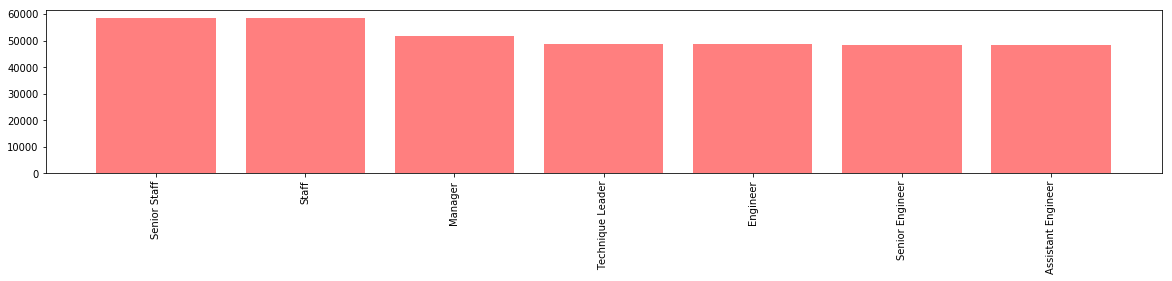

In [18]:
# sal_avg = sal_avg.sort_values(by=['salary'], ascending=False)
# # Set x axis and tick locations
# x_axis = np.arange(len(by_country_mean["country"]))
# tick_locations = [value for value in x_axis]
# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, by_country_mean["points"], color="r", alpha=0.5, align="center")
# plt.xticks(tick_locations, by_country_mean["country"], rotation="vertical")

sal_avg = sal_avg.sort_values(by=['salary'], ascending=False)
# Set x axis and tick locations
x_axis = np.arange(len(sal_avg["title"]))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, sal_avg["salary"], color="r", alpha=0.5, align="center")
plt.xticks(tick_locations, sal_avg["title"], rotation="vertical")




It appears that most of the technical staff are making the same average salary regardless of seniority.  In addition, the engineers and technique leaders are making less than all other types staff.  If I am id #499942 then my salary is 40k which is the least salary paid to anyone in the company. Time to get the resume in order...

Steps to get this done:
I had to install psycopg2 to connect to postgres.  
Add a user/group & password to postgres.
The user had to be granted access to the database.

The data was then pulled into a dataframe via a select & join statemets
The data was then averaged and grouped by title
The plot was made via matplotlib
